## Data Barədə

Verilmiş data New York şəhərindəki əsas satış məhsulu paltar olan bir Ecommerce şirkətinə aiddir. Bu şirkət məhsullarını online satdığı halda müştərilərə öz satış məntəqələrində stil üzrə məsləhətlər də təklif edir. Müştərilər bu məntəqələrə gələrək şəxsi stilistlə görüşdükdün sonra online şəkildə mobil app və ya webpage-dən istədikləri məhsulları sifariş edirlər. 

**Şirkətin etməyə çalışdığı isə öz resurslarını mobil app və ya webpage-ə doğru yönəltməsinə qərar verməkdir. Bunun üçün müştərilərin bu şirkətdə illik xərclərini predict edə bilən bir model quraraq bu model üçün mobil app və ya webpage-də keçirilən vaxtın hansının daha çox önəm daşıdığını müəyyən etməkdir**

Data aşağıdakı kimidir:

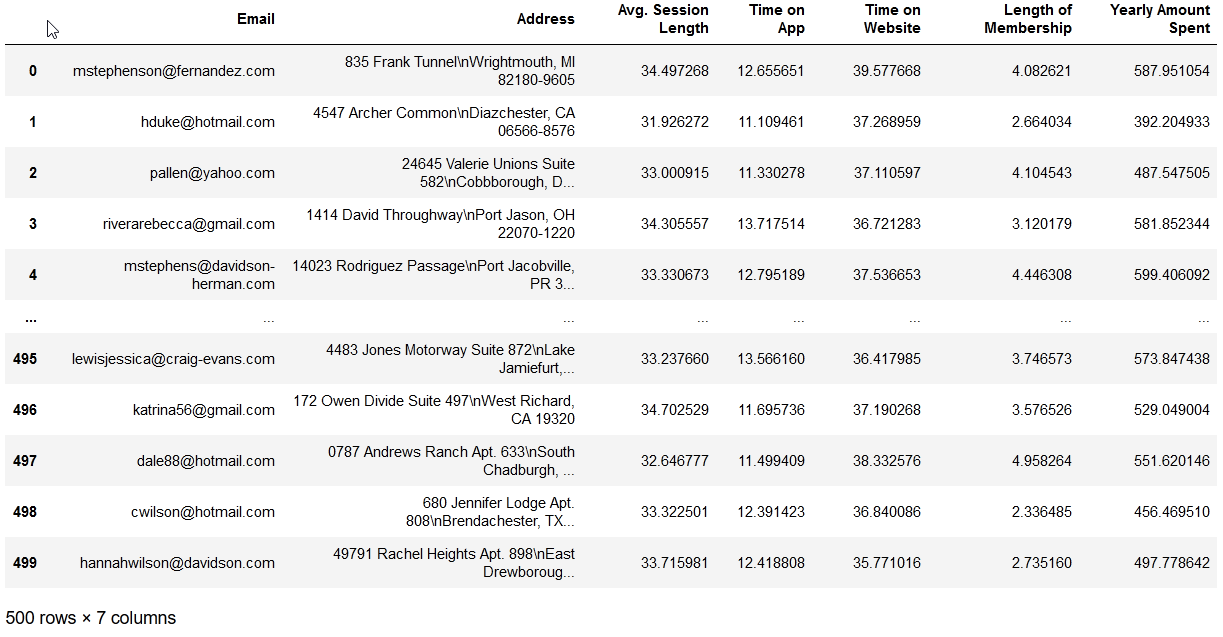


Datada aşağıda gördüyümüz sütunlar vardır:
* `email` - müştərinin email-i
* `Address` - müştərinin adresi
* `Avg. Session Length` - müştərinin şəxsi stilistlə keçirdiyi vaxt (dəqiqələrlə)
* `Time on App` - müştərinin mobil app-də keçirdiyi vaxt (dəqiqələrlə)
* `Time on Website` - müştərinin webiste-da keçirdiyi vaxt (dəqiqələrlə)
* `Length of Membership` - müştərinin satıcı şirkətin online servisinə üzvlük müddəti (illərlə)
* `Yearly Amount Spent` - müştərinin illik alış-veriş xərci (USD)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Ecommerce_Customers.csv')
df.head(10)

,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",32.021595,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",31.936549,11.814128,37.145168,3.202806,427.199385


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [64]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,shuffle = True)

In [67]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [68]:
linreg.coef_

array([26.11588152, 38.22238032,  0.79720082, 61.35918023])

In [69]:
linreg.intercept_

-1071.51004217596

In [70]:
y_pred = linreg.predict(X_test)

In [72]:
r2_score(y_test,y_pred)

0.9804206587203099

In [73]:
mae = mean_absolute_error
mse = mean_squared_error

In [74]:
print('Mean Absolute Error:',mae(y_test,y_pred))

Mean Absolute Error: 8.21336605728244


In [75]:
print('Mean Squared Error:',np.sqrt(mse(y_test,y_pred)))

Mean Squared Error: 10.329783965945746


In [76]:
pd.DataFrame(linreg.coef_,X.columns,columns = ['coef'])

,coef
Avg. Session Length,26.115882
Time on App,38.222380
Time on Website,0.797201
Length of Membership,61.359180
